**–û–ø–∏—Å–∞–Ω–∏–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è**

–¶–µ–ª—å—é –¥–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç—ã —è–≤–ª—è–µ—Ç—Å—è –ø—Ä–æ–≤–µ—Å—Ç–∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –∞–Ω–∏–º–µ –∏ –º–∞–Ω–≥, —Å –ø–æ–º–æ—â—å—é –¥–∞–Ω–Ω—ã—Ö, –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —á–µ—Ä–µ–∑ Jikan API (API –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã MyAnimeList). –î–ª—è –¥–æ—Å—Ç–∏–∂–µ–Ω–∏—è –¥–∞–Ω–Ω–æ–π —Ü–µ–ª–∏ –±—É–¥–µ–º –≤—ã—è–≤–ª—è—Ç—å –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–∏ –º–µ–∂–¥—É –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å—é, —Ä–µ–π—Ç–∏–Ω–≥–æ–º, –∂–∞–Ω—Ä–∞–º–∏ –∏ –¥—Ä—É–≥–∏–º–∏ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∞–º–∏ –∞–Ω–∏–º–µ –∏ –∏—Ö –º–∞–Ω–≥–∞-–∞–¥–∞–ø—Ç–∞—Ü–∏–π (–∏ –Ω–∞–æ–±–æ—Ä–æ—Ç).


# –ò–º–ø–æ—Ä—Ç—ã –±–∏–±–ª–∏–æ—Ç–µ–∫

In [48]:
import requests
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import time

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import requests
from PIL import Image
from io import BytesIO

# –ü–æ–ª—É—á–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –ø–æ API

In [2]:
data = []
pbar = tqdm(range(1, 201), desc="Loading")

for page in pbar:
    url = f"https://api.jikan.moe/v4/top/anime?page={page}"
    response = requests.get(url)
    if response.status_code == 200:
        for anime in response.json()['data']:
            data.append({
                'title': anime['title'],
                'score': anime['score'],
                'genres': ', '.join([g['name'] for g in anime['genres']]),
                'episodes': anime['episodes'],
                'members': anime['members']
            })
    else:
        print(f"–û—à–∏–±–∫–∞ –Ω–∞ —Å—Ç—Ä–∞–Ω–∏—Ü–µ {page} | Error code: {response.status_code}")
    time.sleep(0.4)

df_anime = pd.DataFrame(data)

Loading:   0%|          | 0/200 [00:00<?, ?it/s]

In [3]:
def convert_date(x):
  if any(x[el] is None for el in ("day", "month", "year")):
    return np.nan

  return f"{x['day']}-{x['month']}-{x['year']}"


data = []

pbar = tqdm(range(1, 201), desc="Loading")

for page in pbar:
    url = f"https://api.jikan.moe/v4/top/manga?page={page}"
    response = requests.get(url)
    if response.status_code == 200:
        for manga in response.json()['data']:
            data.append({
                'title': manga['title'],
                'score': manga['score'],
                'genres': ', '.join([g['name'] for g in manga['genres']]),
                'date': convert_date(manga["published"]["prop"]["from"]),
                'members': manga['members']
            })
    else:
        print(f"–û—à–∏–±–∫–∞ –Ω–∞ —Å—Ç—Ä–∞–Ω–∏—Ü–µ {page} | Error code: {response.status_code}")
    time.sleep(0.4)

df_manga = pd.DataFrame(data)

Loading:   0%|          | 0/200 [00:00<?, ?it/s]

In [4]:
df_anime

title  score  \
0                      Sousou no Frieren   9.31   
1       Fullmetal Alchemist: Brotherhood   9.10   
2                            Steins;Gate   9.07   
3                   One Piece Fan Letter   9.05   
4     Shingeki no Kyojin Season 3 Part 2   9.05   
...                                  ...    ...   
4995                      Kuutei Dragons   6.95   
4996                 Strike the Blood II   6.95   
4997    Gunslinger Girl: Il Teatrino OVA   6.95   
4998     Youjo Senki Movie: Manner Eizou   6.95   
4999          Kirameki Inokori Daisensou   6.95   

                                 genres  episodes  members  
0             Adventure, Drama, Fantasy      28.0  1058537  
1     Action, Adventure, Drama, Fantasy      64.0  3493507  
2               Drama, Sci-Fi, Suspense      24.0  2676066  
3            Action, Adventure, Fantasy       1.0    96551  
4               Action, Drama, Suspense      10.0  2418147  
...                                 ...       ...      ...  
4995                 Adventure, Fantasy      12.0    49112  
4996             Action, Fantasy, Ecchi       8.0   203506  
4997              Action, Drama, Sci-Fi       2.0    24659  
4998                             Comedy       1.0    22602  
4999                                          1.0      873  

[5000 rows x 5 columns]

In [5]:
df_manga

title  score  \
0                                             Berserk   9.47   
1     JoJo no Kimyou na Bouken Part 7: Steel Ball Run   9.32   
2                                            Vagabond   9.27   
3                                           One Piece   9.22   
4                                             Monster   9.16   
...                                               ...    ...   
4995                                  Kaze no Sylphid   7.35   
4996                                      Sagashimono   7.35   
4997                                  Boys on the Run   7.35   
4998                                      Love‚ô•Zipper   7.35   
4999                                   Hanasaki Kanon   7.35   

                                                 genres       date  members  
0     Action, Adventure, Award Winning, Drama, Fanta...  25-8-1989   741864  
1              Action, Adventure, Mystery, Supernatural  19-1-2004   288051  
2                      Action, Adventure, Award Winning   3-9-1998   417787  
3                            Action, Adventure, Fantasy  22-7-1997   654732  
4                         Award Winning, Drama, Mystery  5-12-1994   264953  
...                                                 ...        ...      ...  
4995                                      Drama, Sports  13-9-1989      656  
4996                                     Drama, Romance   1-1-2009     2059  
4997                     Comedy, Drama, Romance, Sports   1-1-2005     9554  
4998                                            Romance   1-1-2010     3593  
4999                                              Drama  8-10-2005      971  

[5000 rows x 5 columns]

# –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –∏ —Å–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–µ —Ñ–∏—á–∏

## –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ NaN

–ü—Ä–æ–≤–µ—Ä–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ NaN –∑–Ω–∞—á–µ–Ω–∏–π

In [6]:
df_anime.isna().sum()

title        0
score        0
genres       0
episodes    35
members      0
dtype: int64

–ù–∞–º –Ω—É–∂–Ω–æ –∫–∞–∫ —Ç–æ –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å NaN –≤ ```episodes```. –¢–∞–∫ –∫–∞–∫ –∏—Ö –æ—á–µ–Ω—å –º–∞–ª–æ: $\frac{35}{5000}$ –º—ã –º–æ–∂–µ–º –ø—Ä–æ—Å—Ç–æ –≤—ã—Ä–µ–∑–∞—Ç—å –≤—Å–µ —Å–∞–º–ø–ª—ã –≥–¥–µ ```episodes``` —Ä–∞–≤–Ω–æ NaN

In [7]:
df_anime = df_anime.dropna(axis=0).reset_index(drop=True)

In [8]:
df_manga.isna().sum()

title       0
score       0
genres      0
date       19
members     0
dtype: int64

–í —Ñ–∏—á–µ ```data``` –≤ DataFrame ```df_manga``` —Ç–∞–∫–∂–µ –Ω–µ —Ç–∞–∫ –º–Ω–æ–≥–æ NaN —É–¥–∞–ª–∏–º —Å–∞–º–ø–ª—ã —Å –Ω–∏–º–∏ –∏ –ø—Ä–æ–¥–æ–ª–∂–∏–º —Ä–∞–±–æ—Ç—É

In [9]:
df_manga = df_manga.dropna(axis=0).reset_index(drop=True)

## –û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [10]:
# –ù–æ–≤—ã–µ —Ñ–∏—á–∏
df_anime["num_words_in_title"] = df_anime["title"].str.split().apply(lambda x: len(x))
df_manga["num_words_in_title"] = df_manga["title"].str.split().apply(lambda x: len(x))

# –û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö
df_anime["genres"] = df_anime["genres"].str.split(", ")
df_manga["genres"] = df_manga["genres"].str.split(", ")



# –†–∞–±–æ—Ç–∞ —Å –¥–∞–Ω–Ω—ã–º–∏

–ù–∞–π–¥–µ–º –≤—Å–µ —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∂–∞–Ω—Ä—ã –¥–ª—è –º–∞–Ω–≥–∏ –∏ –∞–Ω–∏–º–µ

In [11]:
uniq_anime_genres = df_anime["genres"].explode().unique()
uniq_manga_genres = df_manga["genres"].explode().unique()

uniq_anime_genres = uniq_anime_genres[uniq_anime_genres != ""]
uniq_manga_genres = uniq_manga_genres[uniq_manga_genres != ""]

uniq_anime_genres = np.sort(uniq_anime_genres)
uniq_manga_genres = np.sort(uniq_manga_genres)

df_manga["date"] = pd.to_datetime(df_manga['date'], format='%d-%m-%Y')

In [12]:
uniq_anime_genres

array(['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love',
       'Comedy', 'Drama', 'Ecchi', 'Erotica', 'Fantasy', 'Girls Love',
       'Gourmet', 'Hentai', 'Horror', 'Mystery', 'Romance', 'Sci-Fi',
       'Slice of Life', 'Sports', 'Supernatural', 'Suspense'],
      dtype=object)

In [13]:
uniq_manga_genres

array(['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love',
       'Comedy', 'Drama', 'Ecchi', 'Erotica', 'Fantasy', 'Girls Love',
       'Gourmet', 'Hentai', 'Horror', 'Mystery', 'Romance', 'Sci-Fi',
       'Slice of Life', 'Sports', 'Supernatural', 'Suspense'],
      dtype=object)

In [14]:
results_anime = {}
results_manga = {}


for el in uniq_anime_genres:
    results_anime[el] = df_anime[df_anime["genres"].apply(lambda x: el in x)]["score"].mean()


for el in uniq_manga_genres:
    results_manga[el] = df_manga[df_manga["genres"].apply(lambda x: el in x)]["score"].mean()

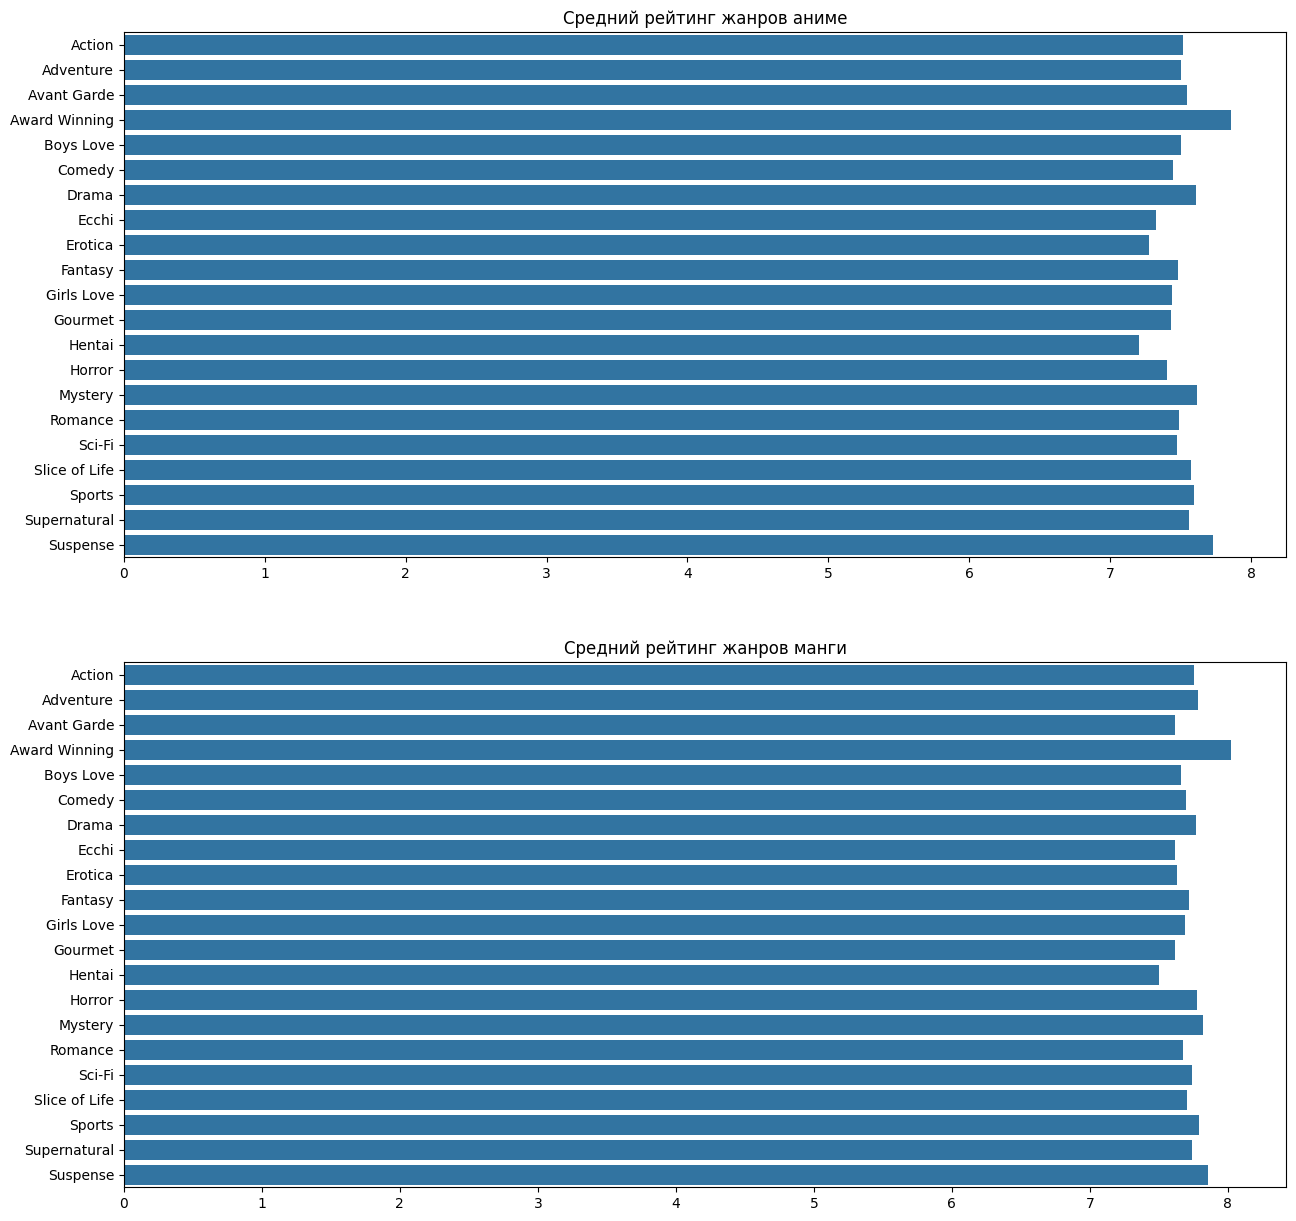

In [19]:
fig, ax = plt.subplots(2, figsize=(15, 15))

sns.barplot(x=results_anime.values(), y=results_anime.keys(), ax=ax[0], orient="h")
ax[0].set_title("–°—Ä–µ–¥–Ω–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –∂–∞–Ω—Ä–æ–≤ –∞–Ω–∏–º–µ")
sns.barplot(x=results_manga.values(), y=results_manga.keys(), ax=ax[1], orient="h")
ax[1].set_title("–°—Ä–µ–¥–Ω–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –∂–∞–Ω—Ä–æ–≤ –º–∞–Ω–≥–∏");

–ö–∞–∫ –º—ã –≤–≤–¥–∏–º —Å—Ä–µ–¥–Ω–∏–µ –æ—á–µ–Ω—å —Å—Ö–æ–∂–∏ –≤ –æ–±–æ–∏—Ö –¥–∞—Ç–∞—Å–µ—Ç–∞—Ö, —ç—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –∫–∞–∂–¥—ã–π —Å–∞–º–ª —Å–≤—è–∑–∞–Ω —Å—Ä–∞–∑—É —Å –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏

–ü—Ä–æ–≤–µ–æ—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–ª–µ–Ω–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–æ–≤ –º–∞–Ω–≥–∏ —Å —É—á–µ—Ç–æ–º –≥–æ–¥–∞ –∏–ª–∏ –º–µ—Å—è—Ü–∞ –µ–µ –≤—ã—Ö–æ–¥–∞

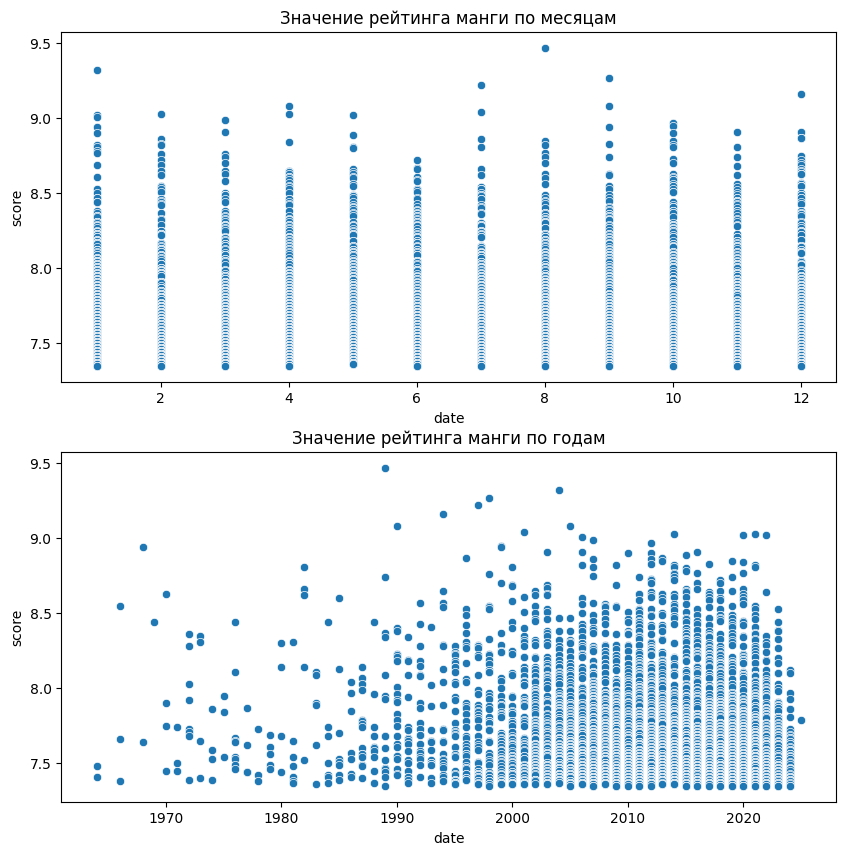

In [26]:
fig, ax = plt.subplots(2, figsize=(10, 10))

sns.scatterplot(x=df_manga["date"].dt.month, y=df_manga["score"], ax=ax[0])
ax[0].set_title("–ó–Ω–∞—á–µ–Ω–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∞ –º–∞–Ω–≥–∏ –ø–æ –º–µ—Å—è—Ü–∞–º");

sns.scatterplot(x=df_manga["date"].dt.year, y=df_manga["score"], ax=ax[1])
ax[1].set_title("–ó–Ω–∞—á–µ–Ω–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∞ –º–∞–Ω–≥–∏ –ø–æ –≥–æ–¥–∞–º");

–ò–∑ –≥—Ä–∞—Ñ–∏–∫–∞ "–∑–Ω–∞—á–µ–Ω–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∞ –º–∞–Ω–≥–∏ –ø–æ –º–µ—Å—è—Ü–∞–º" –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –Ω–µ—Ç —è–≤–Ω–æ–π —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ —É –¥–∞–Ω–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤. –ò–∑ –≥—Ä–∞—Ñ–∏–∫–∞ "–∑–Ω–∞—á–µ–Ω–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∞ –º–∞–Ω–≥–∏ –ø–æ –≥–æ–¥–∞–º" –º–æ–∂–µ–º –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –¥–æ 2000 –≥–æ–¥–∞ –≤ –¥–∞–Ω–Ω—ã—Ö –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–æ –º–µ–Ω—å—à–µ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–π, –æ–¥–Ω–∞–∫–æ —Å—Ä–µ–¥–∏ –Ω–∏—Ö –±–æ–ª—å—à–µ "–≤—ã–¥–µ–ª—è—é—â–∏—Ö—Å—è" –º–∞–Ω–≥. –í–æ–∑–º–æ–∂–Ω–æ —ç—Ç–æ –±—ã–ª–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –≤ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –±—ã–ª–∏ –¥–æ–±–∞–≤–ª–µ–Ω—ã –Ω–∞–∏–±–æ–ª–µ–µ –∏–∑–≤–µ—Å—Ç–Ω—ã–µ –∏ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ —ç–∫–∑–µ–º–ø–ª—è—Ä—ã.
 –ü–æ—Å–ª–µ 2000 –≥–æ–¥–∞ –ø—Ä–æ–∏–∑–æ—à–µ–ª –±—É–º –∂–∞–Ω—Ä–∞ –∏ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å —ç—Ç–æ–≥–æ –≤–∏–¥–∞ –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä—ã –≤–æ–∑—Ä–æ—Å–ª–∞, –Ω–æ –∏ —Ä–∞–∑–±—Ä–æ—Å –ø–æ —Ä–µ–π—Ç–∏–Ω–≥—É —Å—Ç–∞–ª –æ–±—à–∏—Ä–Ω–µ–µ

–¢–∞–∫–∂–µ –≤–∑–≥–ª—è–Ω–µ–º –Ω–∞ —Å–≤—è–∑—å —Ä–µ–π—Ç–∏–Ω–≥–∞ –∏ members(–∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –¥–æ–±–∞–≤–∏–≤—à–∏—Ö –∞–Ω–∏–º–µ/–º–∞–Ω–≥—É –≤ —Å–ø–∏—Å–æ–∫ "–ø—Ä–æ—Å–º–æ—Ç—Ä–µ–Ω–Ω–æ–µ" –∏–ª–∏ –≤ —Å–ø–∏—Å–∫–æ–∫ "–±—É–¥—É —Å–º–æ—Ç—Ä–µ—Ç—å"). –¢–∞–∫ –∫–∞–∫ –∑–Ω–∞—á–µ–Ω–∏—è members –æ—á–µ–Ω—å –≤–µ–ª–∏–∫–∏, –∏—Å–ø–æ–ª—å–∑—É–µ–º –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–≤–∞–Ω–∏–µ –¥–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏

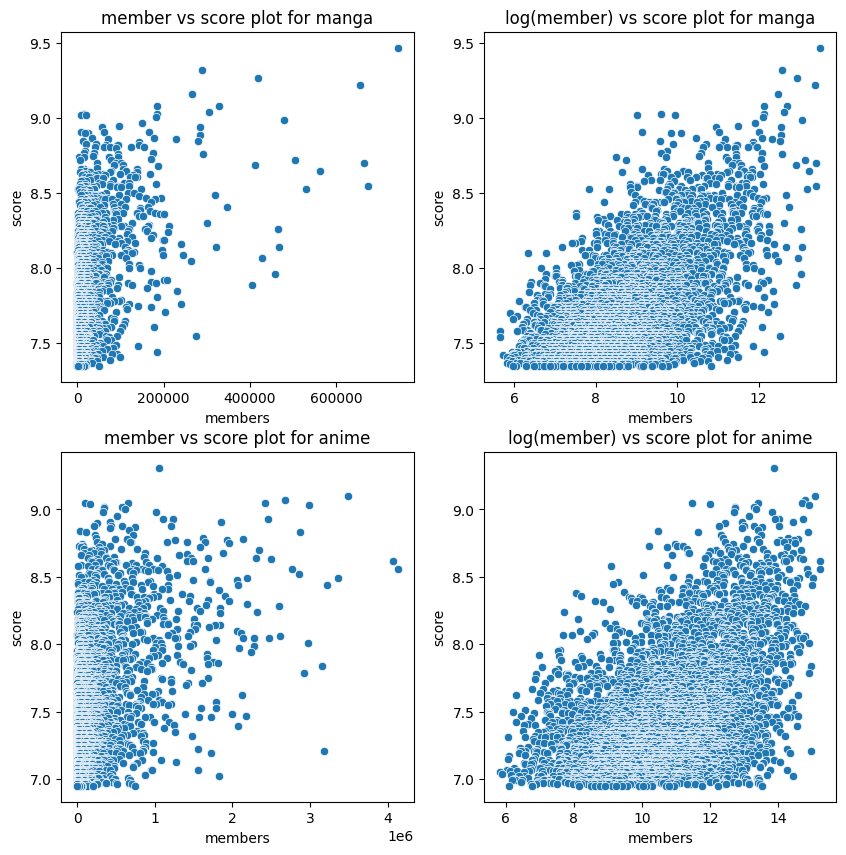

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.scatterplot(x=df_manga["members"], y=df_manga["score"], ax=ax[0][0])
ax[0][0].set_title("member vs score plot for manga");

sns.scatterplot(x=df_anime["members"], y=df_anime["score"], ax=ax[1][0])
ax[1][0].set_title("member vs score plot for anime");

sns.scatterplot(x=np.log(df_manga["members"]), y=df_manga["score"], ax=ax[0][1])
ax[0][1].set_title("log(member) vs score plot for manga");

sns.scatterplot(x=np.log(df_anime["members"]), y=df_anime["score"], ax=ax[1][1])
ax[1][1].set_title("log(member) vs score plot for anime");

–ú–æ–∂–µ–º –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ —á–µ–º –≤—ã—à–µ —Ä–µ–π—Ç–∏–Ω–≥, —Ç–µ–º –±–æ–ª—å—à–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å–º–æ—Ç—Ä–µ–ª–∏/—á–∏—Ç–∞–ª–∏ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–µ –∏–ª–∏ –ø–ª–∞–Ω–∏—Ä—É—é—Ç —ç—Ç–æ —Å–¥–µ–ª–∞—Ç—å

–ü—Ä–æ–≤–µ–æ—Ä–∏–º –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ç–æ–º, —á—Ç–æ –∫–æ–ª-–≤–æ —Å–ª–æ–≤ –≤ –Ω–∞–∑–≤–∞–Ω–∏–∏ –≤–ª–∏—è–µ—Ç –Ω–∞ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å –º–∞–Ω–≥–∏/–∞–Ω–∏–º–µ

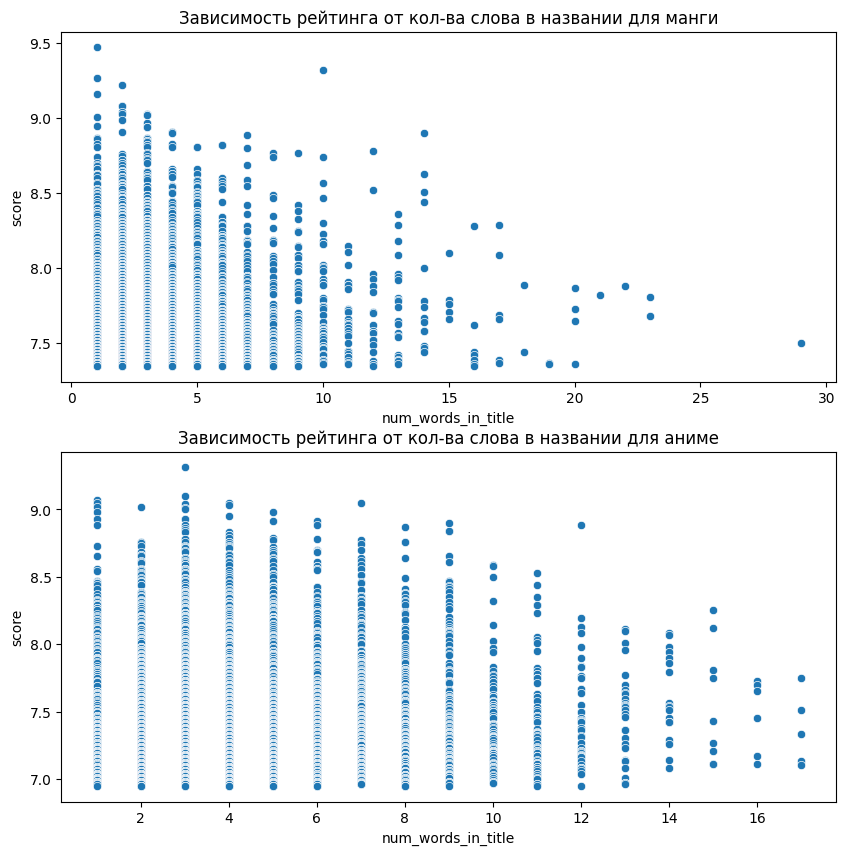

In [33]:
fig, ax = plt.subplots(2, figsize=(10, 10))

sns.scatterplot(x=df_manga["num_words_in_title"], y=df_manga["score"], ax=ax[0])
ax[0].set_title("–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ä–µ–π—Ç–∏–Ω–≥–∞ –æ—Ç –∫–æ–ª-–≤–∞ —Å–ª–æ–≤–∞ –≤ –Ω–∞–∑–≤–∞–Ω–∏–∏ –¥–ª—è –º–∞–Ω–≥–∏");

sns.scatterplot(x=df_anime["num_words_in_title"], y=df_anime["score"], ax=ax[1])
ax[1].set_title("–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ä–µ–π—Ç–∏–Ω–≥–∞ –æ—Ç –∫–æ–ª-–≤–∞ —Å–ª–æ–≤–∞ –≤ –Ω–∞–∑–≤–∞–Ω–∏–∏ –¥–ª—è –∞–Ω–∏–º–µ");

–ù–∞–π–¥–µ–º, –∫–∞–∫ —Å–≤—è–∑–∞–Ω—ã —Ä–µ–π—Ç–∏–Ω–≥–∏ –º–∞–Ω–≥–∏ –∏ –∞–Ω–∏–º–µ, –¥–ª—è —ç—Ç–æ–≥–æ –æ—Ç–±–µ—Ä–µ–º –¥–∞–Ω–Ω—ã–µ —Å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º–∏ title

In [43]:
anime_scores = df_anime[['title', 'score']].rename(columns={'score': 'anime_score'})
manga_scores = df_manga[['title', 'score']].rename(columns={'score': 'manga_score'})

merged_scores = pd.merge(
    anime_scores,
    manga_scores,
    on='title',
    how='inner'
)

merged_scores

title  anime_score  manga_score
0                     Sousou no Frieren         9.31         8.84
1                           Steins;Gate         9.07         8.52
2                           Steins;Gate         9.07         8.05
3                  Ginga Eiyuu Densetsu         9.01         8.62
4                               Gintama         8.93         8.63
...                                 ...          ...          ...
996   Meitantei Conan: Zero no Tea Time         6.96         7.46
997                       Kaibutsu Oujo         6.96         7.46
998                 Satsuriku no Tenshi         6.96         7.64
999                    Fukumenkei Noise         6.95         7.44
1000                     Kuutei Dragons         6.95         7.52

[1001 rows x 3 columns]

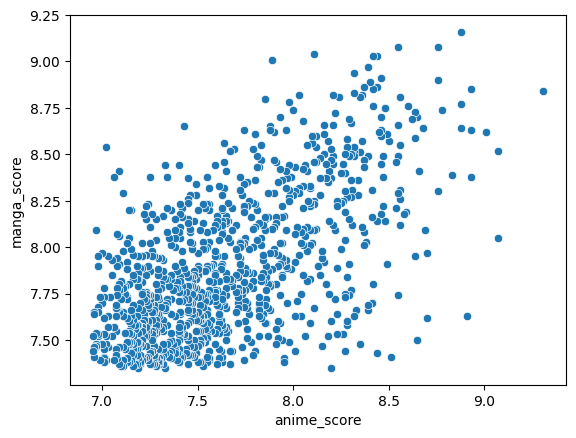

In [41]:
sns.scatterplot(x=merged_scores['anime_score'], y=merged_scores['manga_score']);

–ü–æ–ø—Ä–æ–±—É–µ–º –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é. –ò—Å—Ö–æ–¥—è –∏–∑ —Å–ø–µ—Ü–∏—Ñ–∏–∫–∏ –¥–∞–Ω–Ω—ã—Ö –¥–æ–±–∞–≤–ª—è—Ç—å –∫–æ–Ω—Å—Ç–∞–Ω—Ç—É –Ω–µ–ª–æ–≥–∏—á–Ω–æ, —Ç–∞–∫ —á—Ç–æ —Å–¥–µ–ª–∞–µ–º –≤—Å–µ –±–µ–∑ –Ω–µ–µ

In [42]:

#X = sm.add_constant(X)  # –î–æ–±–∞–≤–ª—è–µ—Ç —Å—Ç–æ–ª–±–µ—Ü –∏–∑ –µ–¥–∏–Ω–∏—Ü (–¥–ª—è intercept)


model = sm.OLS(merged_scores['anime_score'], merged_scores['manga_score'])  # y - –∑–∞–≤–∏—Å–∏–º–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è, X - –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä—ã
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            anime_score   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          4.310e+05
Date:                Mon, 24 Mar 2025   Prob (F-statistic):                        0.00
Time:                        18:09:37   Log-Likelihood:                         -421.68
No. Observations:                1001   AIC:                                      845.4
Df Residuals:                    1000   BIC:                                      850.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
manga_score     0.9690      0.001    656.530      0.000       0.966       0.972
==============================================================================
Omnibus:                       48.113   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.873
Skew:                           0.429   Prob(JB):                     1.83e-15
Kurtosis:                       3.945   Cond. No.                         1.00
==============================================================================

Notes:
[1] R¬≤ is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R2 –±–ª–∏–∑–æ–∫ –∫ 1, –∞ –∑–Ω–∞—á–∏—Ç –æ—Ü–µ–Ω–∫–∞, –∫–æ—Ç–æ—Ä—É—é —Å—Ç–∞–≤—è—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –∞–Ω–∏–º–µ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –∏–¥–µ–Ω—Ç–∏—á–Ω–∞ —Ç–æ–π, –∫–æ—Ç–æ—Ä—É—é –æ–Ω–∏ —Å—Ç–∞–≤—è—Ç –º–∞–Ω–≥–µ

–ü–æ–∫–∞–∂–µ–º, —á—Ç–æ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–∞ —É—Ö—É–¥—à–∏—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç

–ö–∞–∫ –º—ã –≤–∏–¥–∏–º –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç—ã –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–æ —Å–Ω–∏–∑–∏–ª–æ R2

In [44]:
model = sm.OLS(merged_scores['anime_score'], sm.add_constant(merged_scores['manga_score']))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            anime_score   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     586.4
Date:                Mon, 24 Mar 2025   Prob (F-statistic):          2.67e-102
Time:                        18:17:06   Log-Likelihood:                -380.33
No. Observations:                1001   AIC:                             764.7
Df Residuals:                     999   BIC:                             774.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1208      0.229      9.275      0.000       1.672       2.569
manga_score     0.7009      0.029     24.216      0.000       0.644       0.758
==============================================================================
Omnibus:                       61.985   Durbin-Watson:                   0.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.176
Skew:                           0.573   Prob(JB):                     1.74e-17
Kurtosis:                       3.732   Cond. No.                         164.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
pip install requests pillow -q

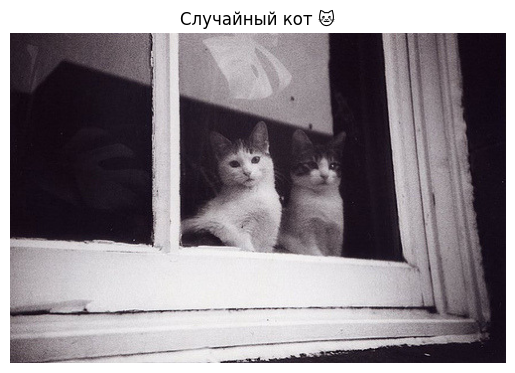

In [50]:
def get_random_cat():
    # 1. –ó–∞–ø—Ä–æ—Å –∫ API
    response = requests.get("https://api.thecatapi.com/v1/images/search")

    if response.status_code == 200:
        # 2. –ò–∑–≤–ª–µ–∫–∞–µ–º URL –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
        data = response.json()
        image_url = data[0]["url"]

        # 3. –ó–∞–≥—Ä—É–∂–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
        image_response = requests.get(image_url)
        img = Image.open(BytesIO(image_response.content))

        # 4. –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
        plt.imshow(img)
        plt.axis("off")  # –£–±–∏—Ä–∞–µ–º –æ—Å–∏
        plt.title("–°–ª—É—á–∞–π–Ω—ã–π –∫–æ—Ç üê±")
        plt.show()

    else:
        print("–û—à–∏–±–∫–∞ –ø—Ä–∏ –∑–∞–ø—Ä–æ—Å–µ:", response.status_code)

# –ó–∞–ø—É—Å–∫–∞–µ–º
get_random_cat()

–≤–æ—Ç –≤–∞–º –≤ –∑–∞–≤–µ—Ä—à–µ–Ω–∏–µ —Ä–∞–Ω–¥–æ–º–Ω—ã–π –∫–æ—Ç :)
